依SK_ID_CURR GROUP 以下
- NAME_CONTRACT_STATUS中各狀態佔比
- 第一張表的ANNUITY/CREDIT除以第二張表的(ANNUITY/CREDIT最大-最小)，其他類似的比例一樣的作法

第三筆新增欄位的整理
- RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED的中位數,max,min
- NAME_CONTRACT_STATUS各項占比
- Delay_Rate的max,median
- SK_DPD_max的max,mean
- SK_DPD_mean的mean
- Contract_Change總和佔全部貸款數量的比例
- Contract_Change_count的mean
- CNT_INSTALMENT/Total_Months_rate的mean
- Contract_Change_rate(CNT_INSTALMENT)的mean
- Contract_Change_rate(Total_Months)的mean
- DAYS_ENTRY_DIFF_MAX的MAX,median
- DAYS_ENTRY_DIFF_MEAN的mean
- AMT_PAYMENT_MEDIAN的median
- AMT_PAYMENT_MAX的MAX,median
- DELAY%的mean,max
- FINISHED的sum除以總次數
- OUTSTANDING的sum除以第一張表的AMT_CREDIT
- OUTSTANDING的sum除以第一張表的AMT_ANNUITY
- AMT_PAYMENT_ALL的MEAN除以第一張表的AMT_CREDIT
- 1_DELAY%的MEAN
- 1_DAYS_ENTRY_DIFF_MAX的MAX,MEAN
- 3_DELAY%的MEAN
- 3_DAYS_ENTRY_DIFF_MAX的MAX,MEAN
- 3_DAYS_ENTRY_DIFF_MEAN的MAX,MEAN
- (其他6,9,-1,-3,-6,-9期的方法一樣)

搭配類別型
- 四種NAME_CONTRACT_TYPE下的第三張表新增欄位整理後(以上新增欄)的狀況

其他
- 某數值乘以DAYS_DECISION或許有用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
pre = pd.read_csv("..\\..\\datasets\\homecdt_eda\\previous_application.csv")

In [3]:
pre.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [4]:
pre.corr()['AMT_ANNUITY'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_ANNUITY        1.000000
AMT_GOODS_PRICE    0.820895
AMT_CREDIT         0.816429
AMT_APPLICATION    0.808872
CNT_PAYMENT        0.394535
Name: AMT_ANNUITY, dtype: float64

In [5]:
pre.corr()['AMT_DOWN_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_DOWN_PAYMENT     1.000000
AMT_APPLICATION      0.482776
AMT_GOODS_PRICE      0.482776
RATE_DOWN_PAYMENT    0.473935
AMT_CREDIT           0.301284
Name: AMT_DOWN_PAYMENT, dtype: float64

In [6]:
pre.corr()['AMT_GOODS_PRICE'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

AMT_GOODS_PRICE    1.000000
AMT_APPLICATION    0.999884
AMT_CREDIT         0.993087
AMT_ANNUITY        0.820895
CNT_PAYMENT        0.672129
Name: AMT_GOODS_PRICE, dtype: float64

In [7]:
pre.corr()['RATE_DOWN_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

RATE_DOWN_PAYMENT    1.000000
AMT_DOWN_PAYMENT     0.473935
CNT_PAYMENT          0.278875
DAYS_DECISION        0.208742
AMT_CREDIT           0.188128
Name: RATE_DOWN_PAYMENT, dtype: float64

In [11]:
pre.corr()['CNT_PAYMENT'].apply(lambda x: np.abs(x)).sort_values(ascending=False).head()

CNT_PAYMENT        1.000000
AMT_APPLICATION    0.680630
AMT_CREDIT         0.674278
AMT_GOODS_PRICE    0.672129
AMT_ANNUITY        0.394535
Name: CNT_PAYMENT, dtype: float64

In [12]:
pre_w_IP = pd.read_csv("..\\..\\datasets\\homecdt_fteng\\previous_application_w_installment_w_POS.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,9,11,16,17,19,20,21,22,23,24,25,26,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
pd.set_option('display.max_rows',None)
pre_w_IP.isna().sum()

SK_ID_PREV                                    0
SK_ID_CURR                                 8775
NAME_CONTRACT_TYPE                        47622
AMT_ANNUITY                              419857
AMT_APPLICATION                           47622
AMT_CREDIT                                47623
AMT_DOWN_PAYMENT                         943466
AMT_GOODS_PRICE                          433137
WEEKDAY_APPR_PROCESS_START                47622
HOUR_APPR_PROCESS_START                   47622
FLAG_LAST_APPL_PER_CONTRACT               47622
NFLAG_LAST_APPL_IN_DAY                    47622
RATE_DOWN_PAYMENT                        943466
RATE_INTEREST_PRIMARY                   1711885
RATE_INTEREST_PRIVILEGED                1711885
NAME_CASH_LOAN_PURPOSE                    47622
NAME_CONTRACT_STATUS                      47622
DAYS_DECISION                             47622
NAME_PAYMENT_TYPE                         47622
CODE_REJECT_REASON                        47622
NAME_TYPE_SUITE                         

In [15]:
pre_w_IP.shape

(1717836, 96)

In [16]:
pre_w_IP.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495    271877.0     Consumer loans     1730.430          17145.0   
1     2802425    108129.0         Cash loans    25188.615         607500.0   
2     2523466    122040.0         Cash loans    15060.735         112500.0   
3     2819243    176158.0         Cash loans    47041.335         450000.0   
4     1784265    202054.0         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... Returned to the store  Approved  \
0                     15.0  ...                   0.0       0.0   
1                     11.0  ...                   0.0       0.0   
2                     11.0  ...                   0.0       0.0   
3                      7.0  ...                   0.0       0.0   
4                      9.0  ...                   NaN       NaN   

   Amortized debt  Canceled  XNA Contract_Change Contract_Change_count  \
0             0.0       0.0  0.0             1.0                  11.0   
1             0.0       0.0  0.0             0.0                   0.0   
2             0.0       0.0  0.0             0.0                   0.0   
3             0.0       0.0  0.0             0.0                   1.0   
4             NaN       NaN  NaN             NaN                   NaN   

   CNT_INSTALMENT/Total_Months_rate Contract_Change_rate(CNT_INSTALMENT)  \
0                               6.0                             0.916667   
1                               7.2                             0.000000   
2                               1.2                             0.000000   
3                               1.0                             0.083333   
4                               NaN                                  NaN   

  Contract_Change_rate(Total_Months)  
0                           5.500000  
1                           0.000000  
2                           0.000000  
3                           0.083333  
4                                NaN  

[5 rows x 96 columns]

In [17]:
pre_w_IP.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_NUMBER_GROUP_MAX', 'NUM_INSTALMENT_NUMBER_GROUP_MIN',
       'DAYS_ENTRY_PAYMENT_MAX', 'DAYS_ENTR

In [18]:
pd.set_option('display.max_rows',None)
pre_w_IP.isna().sum()/pre_w_IP.shape[0]

SK_ID_PREV                              0.000000
SK_ID_CURR                              0.005108
NAME_CONTRACT_TYPE                      0.027722
AMT_ANNUITY                             0.244410
AMT_APPLICATION                         0.027722
AMT_CREDIT                              0.027723
AMT_DOWN_PAYMENT                        0.549218
AMT_GOODS_PRICE                         0.252141
WEEKDAY_APPR_PROCESS_START              0.027722
HOUR_APPR_PROCESS_START                 0.027722
FLAG_LAST_APPL_PER_CONTRACT             0.027722
NFLAG_LAST_APPL_IN_DAY                  0.027722
RATE_DOWN_PAYMENT                       0.549218
RATE_INTEREST_PRIMARY                   0.996536
RATE_INTEREST_PRIVILEGED                0.996536
NAME_CASH_LOAN_PURPOSE                  0.027722
NAME_CONTRACT_STATUS                    0.027722
DAYS_DECISION                           0.027722
NAME_PAYMENT_TYPE                       0.027722
CODE_REJECT_REASON                      0.027722
NAME_TYPE_SUITE     

In [28]:
pre_w_IP['CHANNEL_TYPE'].dtype

dtype('O')

In [33]:
for name in pre_w_IP.columns:
    if np.dtype(pre_w_IP[name])=='O' :
        print('\n')
        print(f'{name}欄')
        print(pre_w_IP[name].unique())



NAME_CONTRACT_TYPE欄
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA' nan]


WEEKDAY_APPR_PROCESS_START欄
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY'
 nan]


FLAG_LAST_APPL_PER_CONTRACT欄
['Y' 'N' nan]


NAME_CASH_LOAN_PURPOSE欄
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person' nan]


NAME_CONTRACT_STATUS欄
['Approved' 'Refused' 'Canceled' 'Unused offer' nan]


NAME_PAYMENT_TYPE欄
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer' nan]


CODE_REJECT_REASON欄
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOF

In [19]:
for name in pre_w_IP.columns:
    if np.dtype(pre_w_IP[name])!='O' :
        print(name)

SK_ID_PREV
SK_ID_CURR
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
NUM_INSTALMENT_NUMBER_GROUP_MAX
NUM_INSTALMENT_NUMBER_GROUP_MIN
DAYS_ENTRY_PAYMENT_MAX
DAYS_ENTRY_PAYMENT_MIN
DAYS_ENTRY_DIFF_MAX
DAYS_ENTRY_DIFF_MEAN
AMT_PAYMENT_MEDIAN
AMT_PAYMENT_MAX
DELAY_SUM
DELAY%
AMT_INSTALMENT_ALL
AMT_PAYMENT_ALL
1_DELAY%
1_DAYS_ENTRY_DIFF_MAX
3_DELAY%
3_DAYS_ENTRY_DIFF_MAX
3_DAYS_ENTRY_DIFF_MEAN
6_DELAY%
6_DAYS_ENTRY_DIFF_MAX
6_DAYS_ENTRY_DIFF_MEAN
9_DELAY%
9_DAYS_ENTRY_DIFF_MAX
9_DAYS_ENTRY_DIFF_MEAN
-1_DELAY%
-1_DAYS_ENTRY_DIFF_MAX
-3_DELAY%
-3_DAYS_ENTRY_DIFF_MAX
-3_DAYS_ENTRY_DIFF_MEAN
-6_DELAY%
-6_DAYS_ENTRY_DIFF_MAX
-6_DAYS_ENTRY_DIFF_MEAN
-9_DELAY%
-9_DAYS_ENTRY_DIFF_MAX
-9_DAYS_ENTRY_DIFF_MEAN

In [20]:
pre_w_IP['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer', nan],
      dtype=object)

In [21]:
pre_w_IP['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [56]:
pre_w_IP['AMT_PAYMENT_MEDIAN%'] = pre_w_IP['AMT_PAYMENT_MEDIAN']/pre_w_IP['AMT_INSTALMENT_ALL']
pre_w_IP['AMT_PAYMENT_MAX%'] = pre_w_IP['AMT_PAYMENT_MAX']/pre_w_IP['AMT_INSTALMENT_ALL']

In [57]:
pre_w_IP_A = pre_w_IP[pre_w_IP['NAME_CONTRACT_STATUS']=='Approved'].copy()
pre_w_IP_A.shape

(1036781, 98)

In [58]:
pre_w_IP_A['Annuity/Credit'] = pre_w_IP_A['AMT_ANNUITY']/pre_w_IP_A['AMT_CREDIT']

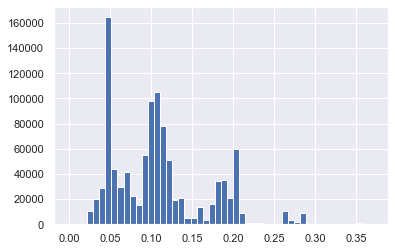

In [26]:
pre_w_IP_A['Annuity/Credit'].hist(bins=50)

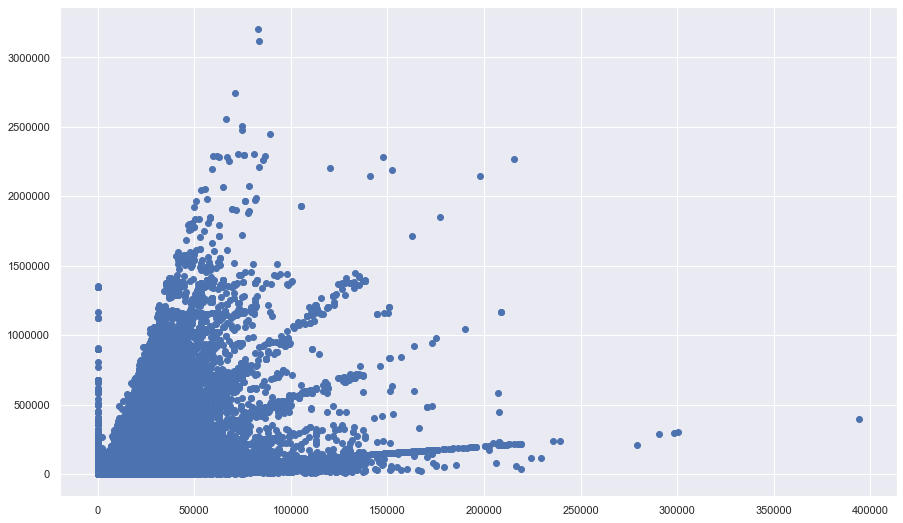

In [49]:
plt.figure(figsize=(15,9))
plt.scatter(x=pre_w_IP_A['AMT_ANNUITY'],y=pre_w_IP_A['AMT_PAYMENT_MEDIAN'])

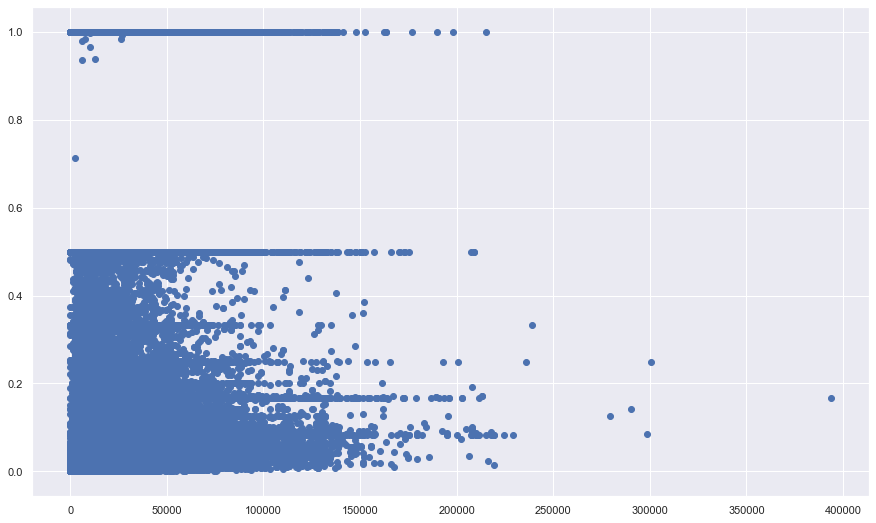

In [62]:
plt.figure(figsize=(15,9))
plt.scatter(x=pre_w_IP_A['AMT_ANNUITY'],y=pre_w_IP_A['AMT_PAYMENT_MEDIAN%'])

In [63]:
pre_w_IP_A['APPLICATION/CREDIT'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_CREDIT']

In [64]:
pre_w_IP_A['DOWN_PAYMENT/ANNUITY'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_ANNUITY']
pre_w_IP_A['DOWN_PAYMENT/CREDIT'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['DOWN_PAYMENT/ANNUITY'] = pre_w_IP_A['AMT_DOWN_PAYMENT']/pre_w_IP_A['AMT_ANNUITY']
pre_w_IP_A['GOODS_PRICE/CREDIT'] = pre_w_IP_A['AMT_GOODS_PRICE']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['APPLICATION/CREDIT'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_CREDIT']
pre_w_IP_A['APPLICATION/GOODS_PRICE'] = pre_w_IP_A['AMT_APPLICATION']/pre_w_IP_A['AMT_GOODS_PRICE']

In [65]:
pre_w_IP_A['FINISHED'].value_counts()

1.0    956047
0.0      2787
Name: FINISHED, dtype: int64

In [69]:
pre_w_IP_A['SK_ID_CURR'].value_counts().sort_values(ascending=False)

309133.0    27
265240.0    24
272099.0    24
328085.0    23
152214.0    23
265588.0    22
395125.0    22
344403.0    21
426540.0    21
326092.0    21
382378.0    21
390000.0    21
192587.0    20
156668.0    20
382838.0    20
253325.0    20
293823.0    20
197583.0    20
450053.0    20
380425.0    20
189332.0    20
421897.0    20
300015.0    19
152271.0    19
124981.0    19
210663.0    19
209963.0    19
147206.0    19
227585.0    19
431306.0    19
203046.0    19
206795.0    19
166702.0    19
435183.0    19
202534.0    19
222918.0    19
261121.0    19
267366.0    19
305307.0    19
130187.0    19
358597.0    19
210548.0    19
253259.0    19
265042.0    19
277314.0    19
314225.0    19
435533.0    19
174805.0    19
254208.0    18
126272.0    18
388999.0    18
113077.0    18
453561.0    18
222024.0    18
215564.0    18
451421.0    18
323337.0    18
219288.0    18
307985.0    18
303029.0    18
331681.0    18
307291.0    18
289645.0    18
345273.0    18
422569.0    18
160556.0    18
257860.0  

In [72]:
pre_w_IP_A['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1036781
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [73]:
pre_w_IP_A['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1.0    1036044
0.0        737
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64